In [2]:
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import KFold
from scipy.spatial import distance
from sklearn.decomposition import PCA
from numpy import linalg as LA
from scipy.stats import pearsonr
import seaborn as sns
import copy
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import csv
from sklearn import metrics
import tensorflow as tf
import tensorflow.contrib.layers as tl
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten,Input
from keras import backend as K
from keras.models import Model, load_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from scipy.spatial import distance
from sklearn.decomposition import PCA
from numpy import linalg as LA

Using TensorFlow backend.


In [4]:
TrainX = pd.read_csv('fraud_prep.csv',delimiter=',')
print(TrainX.shape)

(284807, 31)


In [3]:
TrainX.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
Y = TrainX['Class']
del TrainX['Class']
#del TrainX['Time']
print (TrainX.shape)
print (Y.shape)

(284807, 30)
(284807,)


### Logistic Regression

In [6]:

X_train,X_test,Y_train,Y_test = train_test_split(TrainX,Y,test_size = 0.3,random_state=42)

#Normal Logistic Regression
regr = linear_model.LogisticRegression(C=1e5)
regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)
probs = regr.predict_proba(X_test)
print (metrics.accuracy_score(Y_test, Y_pred))
print ("accuracy", np.mean(Y_pred==Y_test))
print ("AUC Value", metrics.roc_auc_score(Y_test, probs[:, 1]))
print (metrics.confusion_matrix(Y_test, Y_pred))
print (metrics.classification_report(Y_test, Y_pred))

0.998946666199
accuracy 0.998946666199
AUC Value 0.905032533017
[[85271    36]
 [   54    82]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.69      0.60      0.65       136

avg / total       1.00      1.00      1.00     85443



### Unsupervised method using Autoencoders

In [7]:
TrainX = pd.read_csv('fraud_prep.csv',delimiter=',')
print (TrainX.shape)
del TrainX['Time']

(284807, 31)


0    284315
1       492
Name: Class, dtype: int64


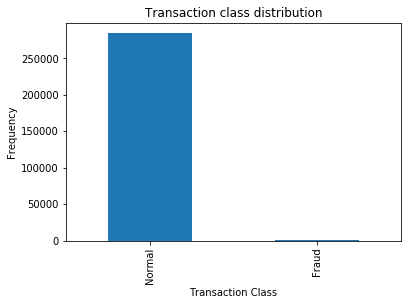

In [8]:
count_classes = pd.value_counts(TrainX['Class'], sort = True)
print (count_classes)
count_classes.plot(kind = 'bar')
plt.title("Transaction class distribution")
plt.xticks(range(2), ['Normal','Fraud'])
plt.xlabel("Transaction Class")
plt.ylabel("Frequency")
plt.show()

In [11]:
X_train,X_test = train_test_split(TrainX,test_size = 0.3,random_state=42)
X_train = X_train[X_train.Class==0]
del X_train['Class']
y_test = X_test['Class']
del X_test['Class']
print (X_train.shape)
print (X_test.shape)
print (y_test.shape)
print (X_train.head())
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

(199008, 29)
(85443, 29)
(85443,)
              V1        V2        V3        V4        V5        V6        V7  \
2557   -2.289565 -0.480260  0.818685 -1.706423  0.822102 -1.660326  0.944047   
247823 -0.313717 -4.064342 -3.398445  0.704011  0.101662  1.529848  1.551670   
152342 -1.809763 -0.567439  2.265186 -0.960318 -1.212537  1.516493 -1.417176   
103385  1.192319  0.178575  0.141491  0.459628 -0.049959 -0.112122 -0.163883   
8771   -0.963451  0.700311  1.097333 -1.547626  0.669966  0.513533  0.333683   

              V8        V9       V10   ...          V20       V21       V22  \
2557   -0.541765  1.323156 -0.434426   ...    -0.831985 -0.210837  0.914737   
247823 -0.036774  0.015829 -0.359561   ...     2.142593  0.853186 -0.091941   
152342  0.903421  1.961027 -0.724328   ...    -0.554004 -0.509915 -0.424978   
103385  0.155740 -0.067566 -0.130220   ...    -0.149985 -0.240464 -0.739862   
8771    0.270900  1.381880 -0.659956   ...     0.122458 -0.279519 -0.470181   

          

### Keras only

In [17]:
K.clear_session()
InputWidth = X_train.shape[1]
model = Sequential()
model.add(Dense(32, input_shape = (InputWidth,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(InputWidth, activation='relu'))
print (model.summary())
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 29)                493       
Total params: 2,333
Trainable params: 2,333
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
print (X_train.shape)
print (X_test.shape)
output = model.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=300, batch_size=128, verbose=2).history
#model.fit(X_train,X_train)
# Final evaluation of the model
#scores = model.evaluate(X_test, y_test, verbose=0)
#print("Baseline Error: %.2f%%" % (100-scores[1]*100))

(199008, 29)
(85443, 29)
Train on 199008 samples, validate on 85443 samples
Epoch 1/300
 - 3s - loss: 0.9479 - acc: 0.9240 - val_loss: 0.8828 - val_acc: 0.9215
Epoch 2/300
 - 3s - loss: 1.9285 - acc: 0.9221 - val_loss: 0.9009 - val_acc: 0.9233
Epoch 3/300
 - 3s - loss: 0.8968 - acc: 0.9230 - val_loss: 0.8750 - val_acc: 0.9245
Epoch 4/300
 - 3s - loss: 0.8656 - acc: 0.9248 - val_loss: 0.8842 - val_acc: 0.9223
Epoch 5/300
 - 3s - loss: 1.0300 - acc: 0.9259 - val_loss: 0.8653 - val_acc: 0.9256
Epoch 6/300
 - 3s - loss: 1.0325 - acc: 0.9287 - val_loss: 0.8710 - val_acc: 0.9367
Epoch 7/300
 - 3s - loss: 0.9249 - acc: 0.9282 - val_loss: 0.8793 - val_acc: 0.9253
Epoch 8/300
 - 3s - loss: 1.1760 - acc: 0.9274 - val_loss: 0.8687 - val_acc: 0.9275
Epoch 9/300
 - 3s - loss: 1.4630 - acc: 0.9267 - val_loss: 0.8654 - val_acc: 0.9335
Epoch 10/300
 - 3s - loss: 0.8764 - acc: 0.9298 - val_loss: 0.8525 - val_acc: 0.9292
Epoch 11/300
 - 3s - loss: 1.2395 - acc: 0.9273 - val_loss: 0.8748 - val_acc: 0.929

Epoch 97/300
 - 3s - loss: 0.8360 - acc: 0.9468 - val_loss: 0.8296 - val_acc: 0.9457
Epoch 98/300
 - 3s - loss: 0.8889 - acc: 0.9439 - val_loss: 0.8324 - val_acc: 0.9490
Epoch 99/300
 - 3s - loss: 0.9175 - acc: 0.9457 - val_loss: 0.8021 - val_acc: 0.9497
Epoch 100/300
 - 3s - loss: 0.9657 - acc: 0.9444 - val_loss: 0.8725 - val_acc: 0.9439
Epoch 101/300
 - 3s - loss: 0.9096 - acc: 0.9462 - val_loss: 0.8149 - val_acc: 0.9502
Epoch 102/300
 - 3s - loss: 0.9737 - acc: 0.9438 - val_loss: 0.8192 - val_acc: 0.9467
Epoch 103/300
 - 3s - loss: 0.8703 - acc: 0.9465 - val_loss: 1.6125 - val_acc: 0.9344
Epoch 104/300
 - 3s - loss: 1.2039 - acc: 0.9446 - val_loss: 0.8058 - val_acc: 0.9481
Epoch 105/300
 - 3s - loss: 0.9782 - acc: 0.9439 - val_loss: 0.8015 - val_acc: 0.9438
Epoch 106/300
 - 3s - loss: 1.0899 - acc: 0.9465 - val_loss: 0.7887 - val_acc: 0.9518
Epoch 107/300
 - 3s - loss: 0.8054 - acc: 0.9455 - val_loss: 1.7365 - val_acc: 0.8875
Epoch 108/300
 - 3s - loss: 1.0284 - acc: 0.9442 - val_lo

Epoch 193/300
 - 3s - loss: 0.8834 - acc: 0.9454 - val_loss: 0.7861 - val_acc: 0.9517
Epoch 194/300
 - 3s - loss: 0.9052 - acc: 0.9415 - val_loss: 0.7956 - val_acc: 0.9436
Epoch 195/300
 - 4s - loss: 0.8310 - acc: 0.9477 - val_loss: 0.7745 - val_acc: 0.9540
Epoch 196/300
 - 3s - loss: 0.8590 - acc: 0.9489 - val_loss: 0.9461 - val_acc: 0.9110
Epoch 197/300
 - 3s - loss: 3.2576 - acc: 0.9353 - val_loss: 0.9152 - val_acc: 0.9282
Epoch 198/300
 - 3s - loss: 0.8172 - acc: 0.9397 - val_loss: 0.8051 - val_acc: 0.9441
Epoch 199/300
 - 4s - loss: 0.7828 - acc: 0.9461 - val_loss: 0.7964 - val_acc: 0.9442
Epoch 200/300
 - 4s - loss: 0.8133 - acc: 0.9434 - val_loss: 0.7817 - val_acc: 0.9528
Epoch 201/300
 - 4s - loss: 0.7830 - acc: 0.9492 - val_loss: 0.8117 - val_acc: 0.9456
Epoch 202/300
 - 3s - loss: 1.0304 - acc: 0.9445 - val_loss: 0.8307 - val_acc: 0.9441
Epoch 203/300
 - 3s - loss: 0.8312 - acc: 0.9451 - val_loss: 0.8038 - val_acc: 0.9490
Epoch 204/300
 - 3s - loss: 0.8922 - acc: 0.9467 - val

Epoch 289/300
 - 3s - loss: 0.8143 - acc: 0.9509 - val_loss: 0.7678 - val_acc: 0.9555
Epoch 290/300
 - 3s - loss: 0.8315 - acc: 0.9524 - val_loss: 0.7756 - val_acc: 0.9552
Epoch 291/300
 - 3s - loss: 0.8435 - acc: 0.9516 - val_loss: 0.8163 - val_acc: 0.9465
Epoch 292/300
 - 3s - loss: 0.9355 - acc: 0.9461 - val_loss: 0.7922 - val_acc: 0.9590
Epoch 293/300
 - 3s - loss: 0.7833 - acc: 0.9479 - val_loss: 0.7838 - val_acc: 0.9456
Epoch 294/300
 - 3s - loss: 0.8480 - acc: 0.9510 - val_loss: 0.7747 - val_acc: 0.9589
Epoch 295/300
 - 3s - loss: 0.7666 - acc: 0.9549 - val_loss: 0.8147 - val_acc: 0.9372
Epoch 296/300
 - 3s - loss: 1.0506 - acc: 0.9488 - val_loss: 1.4365 - val_acc: 0.9427
Epoch 297/300
 - 3s - loss: 0.8105 - acc: 0.9438 - val_loss: 0.8019 - val_acc: 0.9475
Epoch 298/300
 - 3s - loss: 0.9815 - acc: 0.9409 - val_loss: 0.8194 - val_acc: 0.9419
Epoch 299/300
 - 3s - loss: 1.0175 - acc: 0.9403 - val_loss: 0.8245 - val_acc: 0.9414
Epoch 300/300
 - 4s - loss: 0.7975 - acc: 0.9421 - val

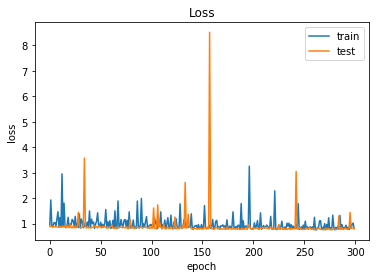

In [21]:
plt.plot(output['loss'],label ='train')
plt.plot(output['val_loss'],label ='test')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [22]:
y_pred = model.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)
print (mse[0])
reconstLoss = pd.DataFrame({'ActualClass':y_test, 'mse':mse})
NormalTran = reconstLoss[(reconstLoss['ActualClass'] == 0) & (reconstLoss['mse'] <5)]
FraudTran = reconstLoss[(reconstLoss['ActualClass'] == 1)]

81.4109953073


In [23]:
Tres = 3
y_pred = [1 if x>Tres else 0 for x in reconstLoss['mse']]
print (len(y_pred))
print (metrics.confusion_matrix(reconstLoss['ActualClass'], y_pred))
print (metrics.confusion_matrix(reconstLoss['ActualClass'], y_pred))


85443
[[83321  1986]
 [   24   112]]
[[83321  1986]
 [   24   112]]
